# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 7. Export data

# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [4]:
# This option ensures the charts i create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\admin\Desktop\New York rentals Dataset'



In [5]:
# Import data

df_rentals =pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'rental_cleaned.csv'), index_col = False)

# 2. Data Cleaning

In [9]:
df_rentals.head()

,Unnamed: 0,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [11]:
# we use this code to drop unnecessary column

df_rentals.drop('Unnamed: 0', axis=1, inplace=True)


In [12]:
df_rentals.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_2020'],
      dtype='object')

In [8]:
df_rentals.dtypes

Unnamed: 0                 int64
id                         int64
neighbourhood             object
latitude                 float64
longitude                float64
room_type                 object
price                      int64
days_occupied_in_2019      int64
minimum_nights             int64
number_of_reviews          int64
reviews_per_month        float64
availability_2020          int64
dtype: object

#### Missing Values Check:

In [13]:
# Check for missing values

df_rentals.isnull().sum() # No missing values!

id                       0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
days_occupied_in_2019    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_2020        0
dtype: int64

#### Duplicates checks:

In [14]:
# Find duplicates

df_dups = df_rentals[df_rentals.duplicated()]

In [15]:
df_dups

,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020


#### mixed-type data:

In [16]:
for col in df_rentals.columns.tolist():
      weird = (df_rentals[[col]].applymap(type) != df_rentals[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_rentals[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

# 3. Exploring relationships

### correlations

##### Pandas cannot compute correlations for non-numeric columns and throws an error when it encounters values like 'Midtown', which it cannot convert to a float. To solve this issue, we need to ensure that only numeric columns are included in the correlation calculation. Here's how i did it:

In [17]:
# Select only numeric columns from df_rentals and calculate their correlation matrix

df_numeric = df_rentals.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

In [18]:
df_numeric.corr()

,id,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
id,1.000000,-0.027029,0.107367,-0.044438,0.222119,-0.067032,-0.334889,0.130388,-0.141505
latitude,-0.027029,1.000000,0.088307,0.032412,0.015671,0.043032,-0.006944,-0.020467,-0.019465
longitude,0.107367,0.088307,1.000000,-0.160400,-0.063585,-0.077714,0.046117,0.129257,0.065265
price,-0.044438,0.032412,-0.160400,1.000000,-0.044186,0.027088,-0.069971,-0.094442,0.036388
days_occupied_in_2019,0.222119,0.015671,-0.063585,-0.044186,1.000000,-0.107419,-0.097414,-0.000978,-0.690022
minimum_nights,-0.067032,0.043032,-0.077714,0.027088,-0.107419,1.000000,-0.164502,-0.203744,0.110711
number_of_reviews,-0.334889,-0.006944,0.046117,-0.069971,-0.097414,-0.164502,1.000000,0.754916,-0.000268
reviews_per_month,0.130388,-0.020467,0.129257,-0.094442,-0.000978,-0.203744,0.754916,1.000000,-0.046048
availability_2020,-0.141505,-0.019465,0.065265,0.036388,-0.690022,0.110711,-0.000268,-0.046048,1.000000


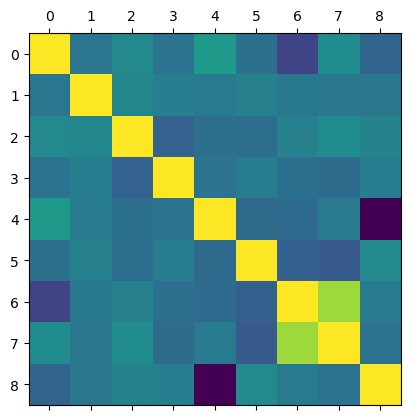

In [19]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_numeric.corr())
plt.show()

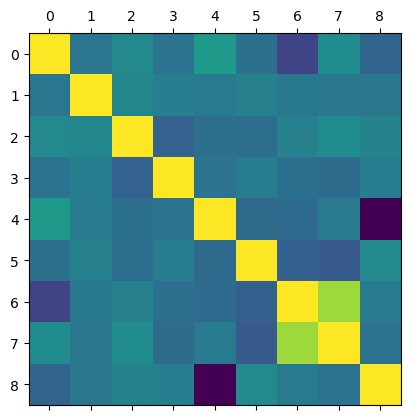

In [20]:
# Save figure
plt.matshow(df_numeric.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
# I will write in the next line the working directory

In [21]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\admin\\Desktop\\New York rentals Dataset\\Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

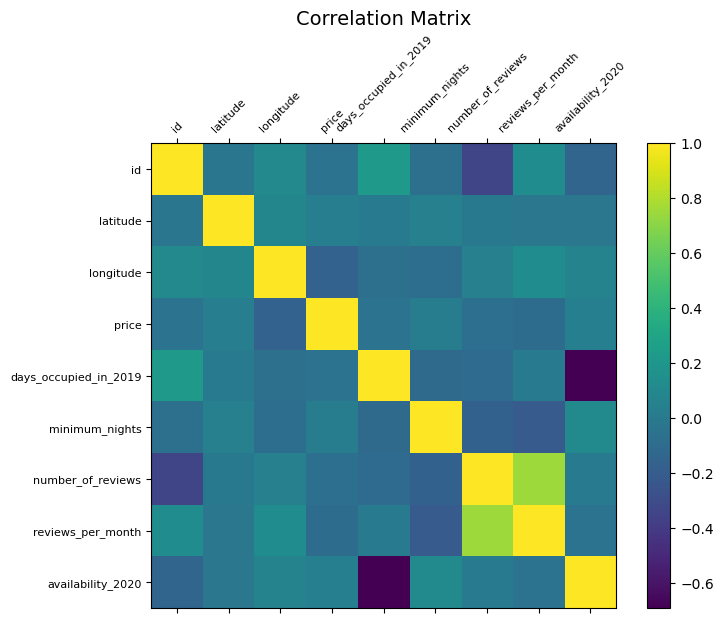

In [47]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 6)) # figure size 
plt.matshow(df_numeric.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

##### This map helps us to see if there's a pattern in how different variables(like price, number of reviews, etc.) either move together or in opposite directions when they change. each square shows how closely related two variables are: for easy reference, I will use the correlated matrix heatmap to discuss the relationships between the variable

In [ ]:
# Save figure
plt.matshow(df_numeric.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

#### Create a correlation heatmap using seaborn:

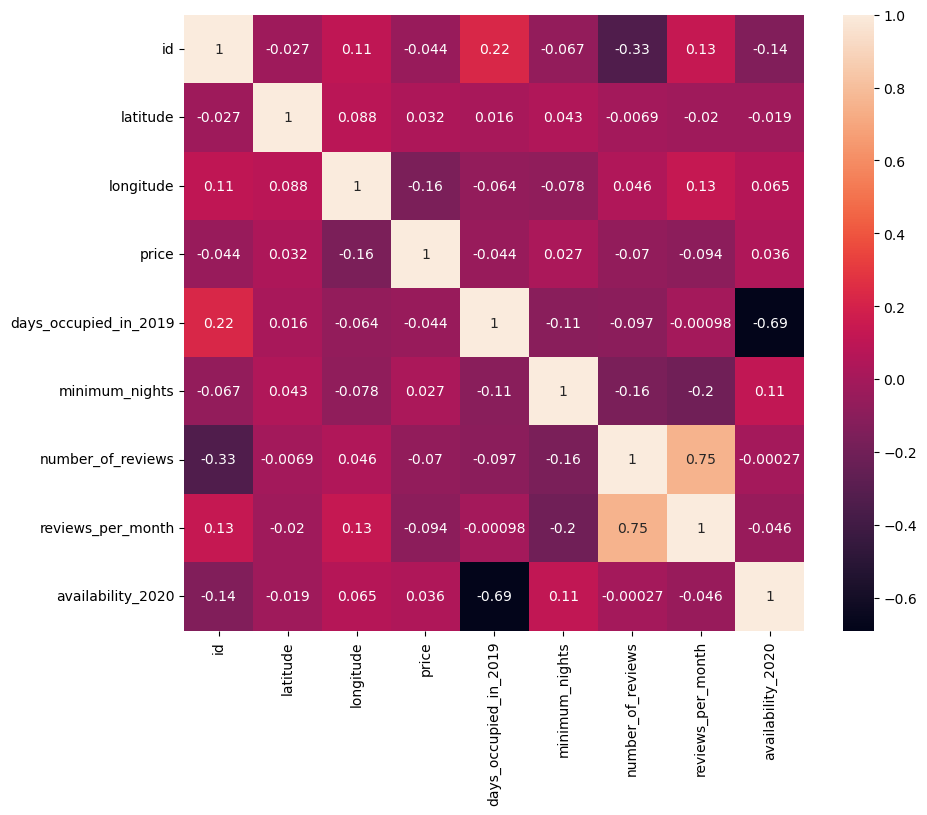

In [38]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_numeric.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

##### the map shows a bunch of numbers that tells how different variables might be linked to each other. Each number ranges from -1 to 1, and the closer it is to 1 or -1, the stronger the relationship. 

##### close to 1 (the dark red areas) these numbers show a positive relationship, which means when one thing goes up, the other one tends to go up too. For example, "number_of_reviews" and "reviews_per_month" have a number 0.75, it means that places with more reviews tend to have more reviews each month. 

# 4. Create scatterplot

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


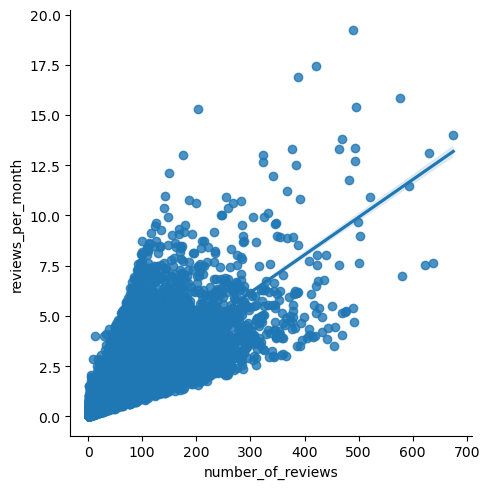

In [48]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = df_rentals)

##### The overall line that goes up as it moves from left to right tells that in general, as the number of reviews increases, the reviews per month also tend to increase. the lower the number of reviews, the lower the reviews per month. so the more reviews a property has overall, the more popular or well-known it might be, therefore, it might continue to get reviewed by new customers. 

##### There's a very dense, dark area towards the bottom left corner, this tells that there are alot of properties with small number of total reviews and a low number of review per month. 

##### The dots are pretty close to the line at the lower end, but as we move to the right, they spread out more. This means that for properties with fewer reviews, the number of reviews per month is quite predictable,but for for property with lot of reviews, the number of reviews per month can vary a lot. There are some dots way above the line, especially towards the right. these are outliers and they represent properties that get a lot of reviews per month compared to what the general trend would suggest.

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


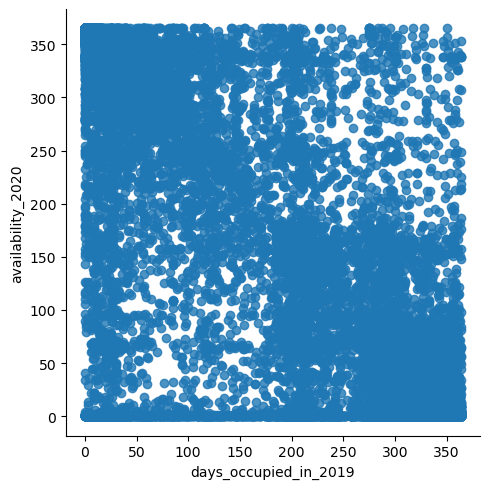

In [49]:
sns.lmplot(x = 'days_occupied_in_2019', y = 'availability_2020', data = df_rentals)

##### The graph compares of days properties was occupied in 2019 and against how available it was in 2020. Each dot on the graph represents a rental property. The dots are spread out across the graph, but there's alot of them towards the bottom right corner. This suggests that properties that were rented alot in 2019(more days occupied) generally had less availability in 2020(fewer days available). 

# 5. Pair Plots:

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


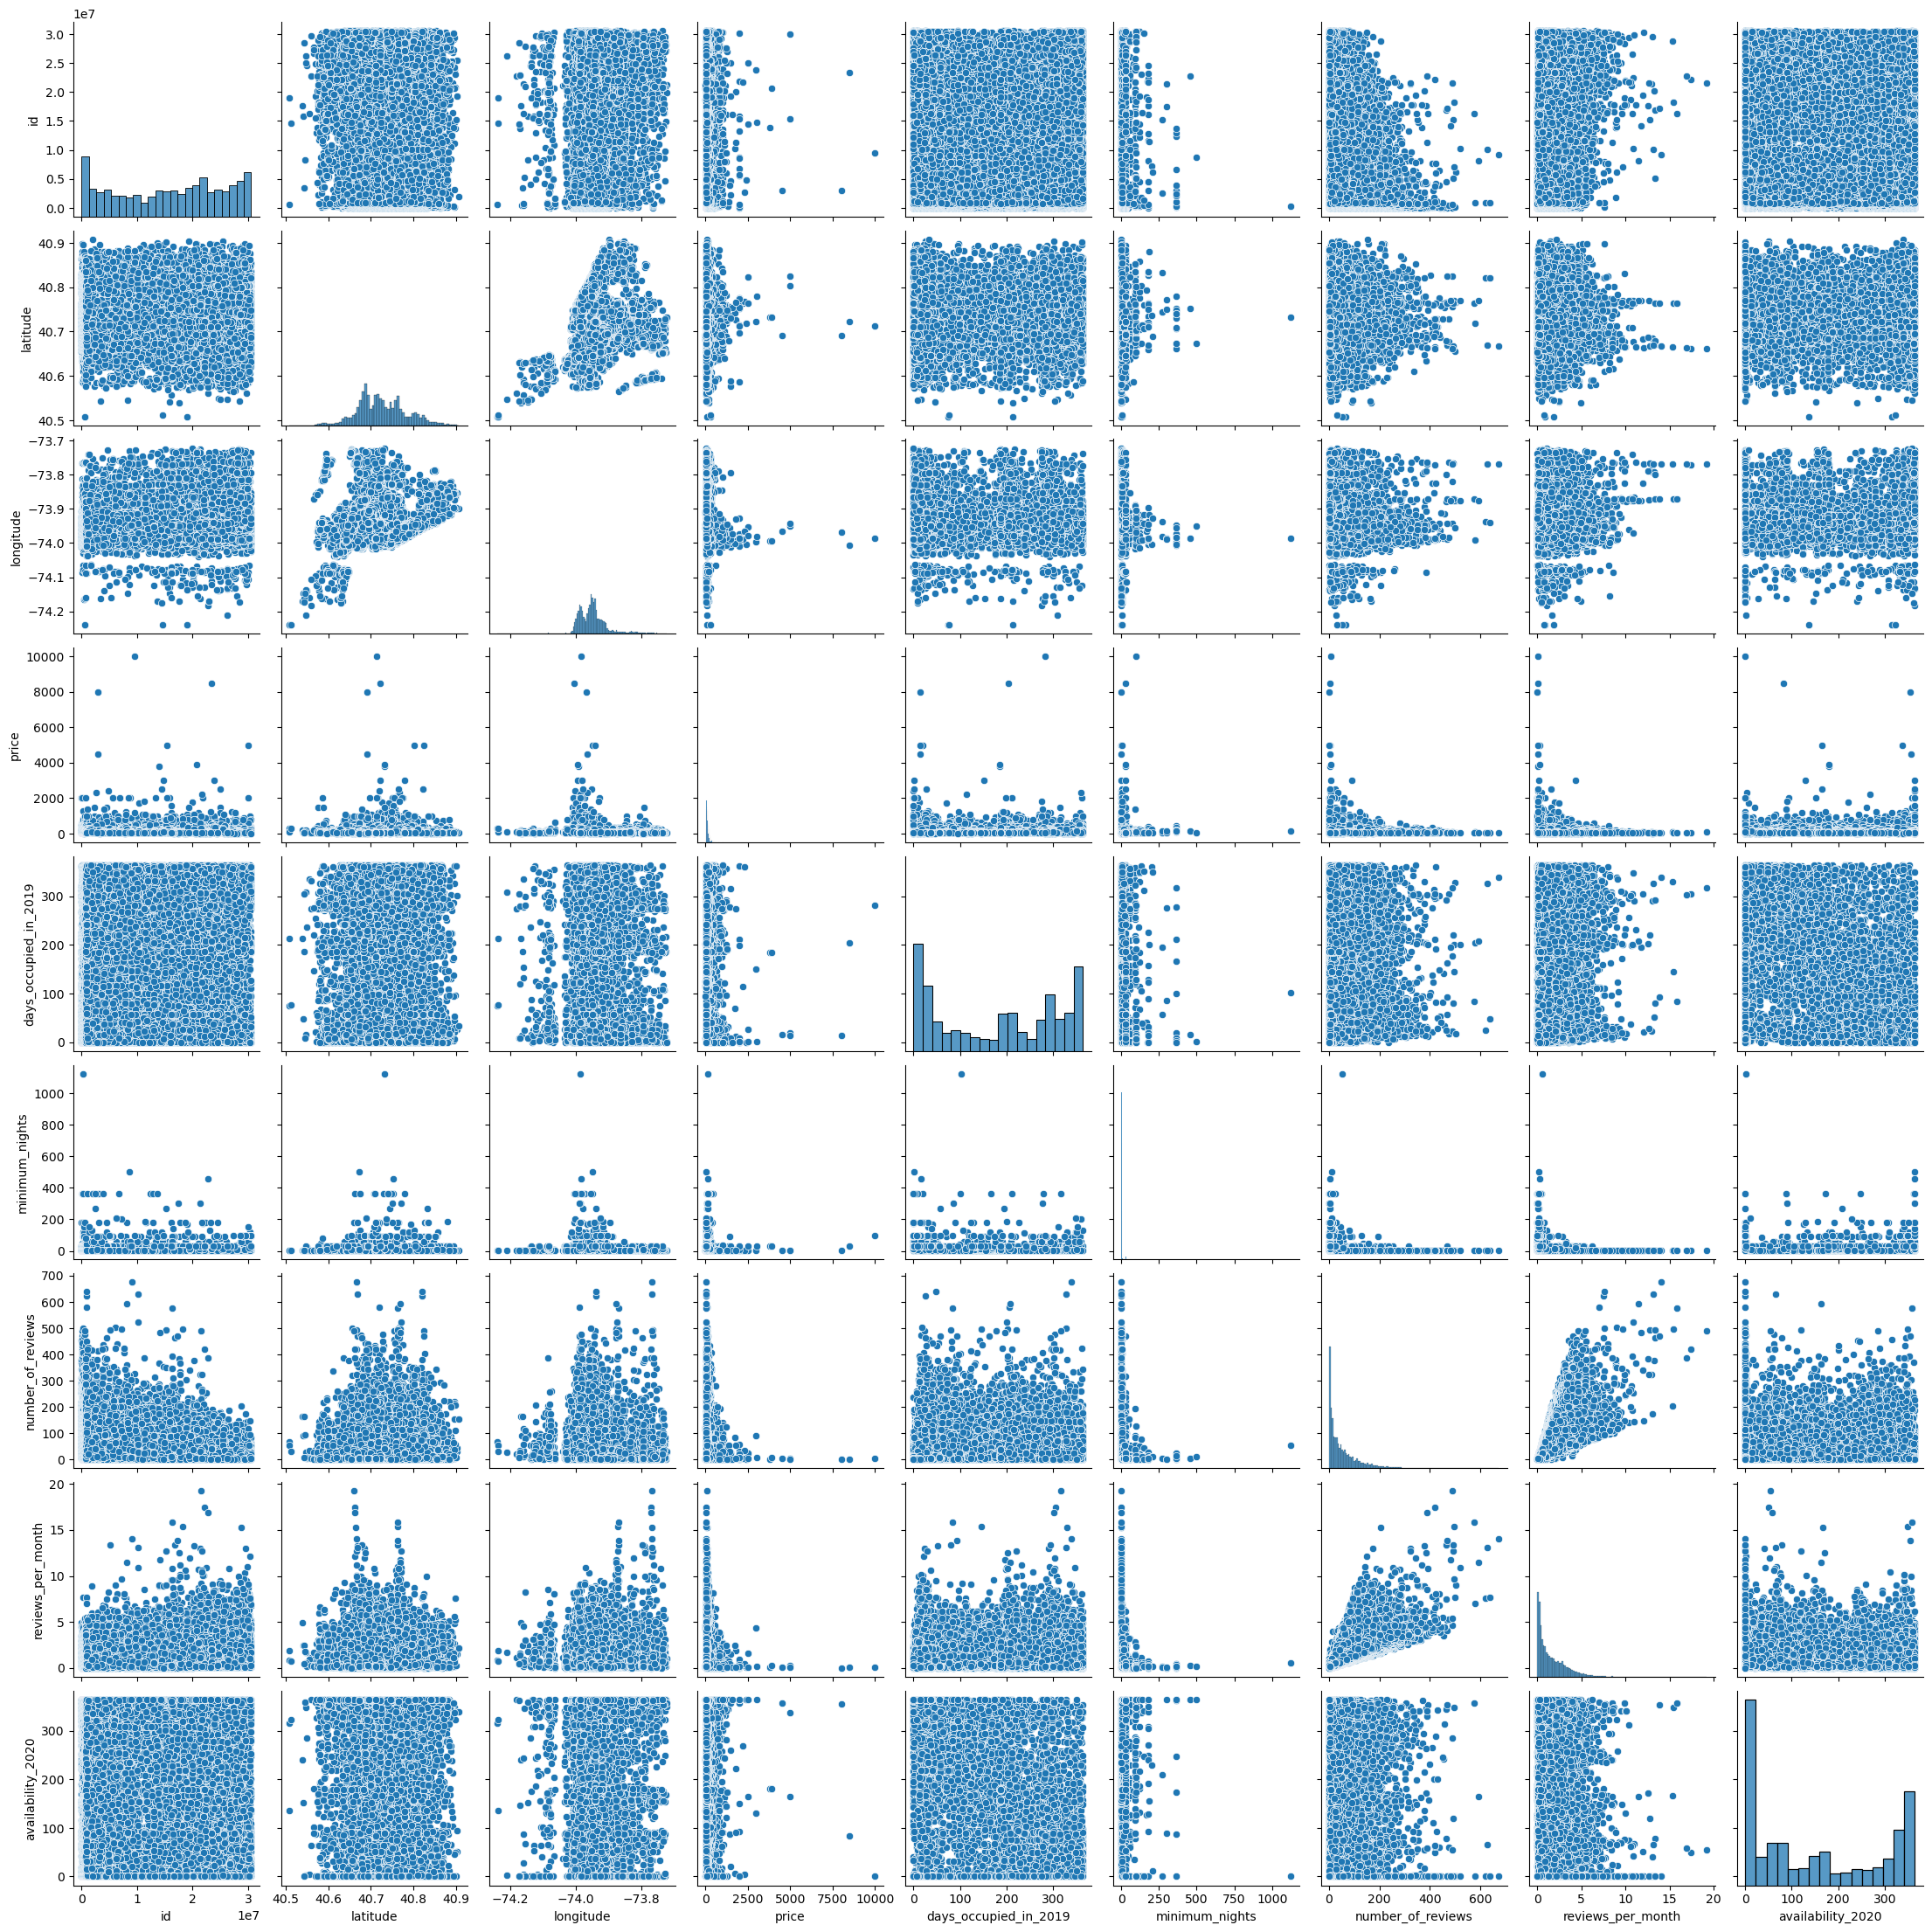

In [50]:
# Create a pair plot 

g = sns.pairplot(df_rentals)

**Distribution of Variables (Diagonal Plots)

##### Variables, like 'latitude' and 'longitude' show tight clusters, suggestig that most properties are concentrated in specific areas.

##### Variables like 'price' and 'number_of_reviews' show a right skewed distribution, where most ofthe data points are on the lower side, but there are some properties with very high values- they could be outliers or luxury listings in expensive neighbourhood.

##### 'days_occupied_in_2019' and 'availability_2020' seem to have a uniform distribution, with a wide spread of values across their ranges. 

**Variables to Explore Further: 

##### Price- It would be interesting to investigate what drives higher prices, given its skewed distribution. 

##### Days occupied in 2019 and availability 2020- Exploring theses could reveal insights into the seasonality rentals and market demand. 

##### Number of Reviews vs Reviews per month:
This could tell us about the property's popularity over time and its reception by guests

**why Explore Further:

##### Price factors in real estate are very important to undertstand and it can aid in pricing strategy for rental listings

##### Occupancy and availability patterns are crucial for predicting demand and planning for property management.

##### Review patterns can impact a property's attractiveness and help owners improve guest experiences. 

# 6. Create a categorical plot

<Axes: xlabel='price', ylabel='Count'>

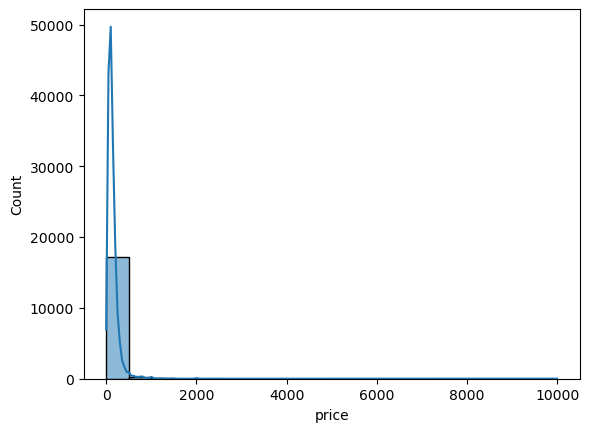

In [58]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_rentals['price'], bins = 20, kde = True)


In [59]:
df_rentals.loc[df_rentals['price'] < 200, 'Price category'] = 'Low price'

In [60]:
df_rentals.loc[(df_rentals['price'] >= 200) & (df_rentals['price'] <500), 'Price category'] = 'Middle price'

In [61]:
df_rentals.loc[df_rentals['price'] >= 500, 'Price category'] = 'High price'

In [62]:
df_rentals['Price category'].value_counts(dropna = False)

Price category
Low price       14467
Middle price     2774
High price        373
Name: count, dtype: int64

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


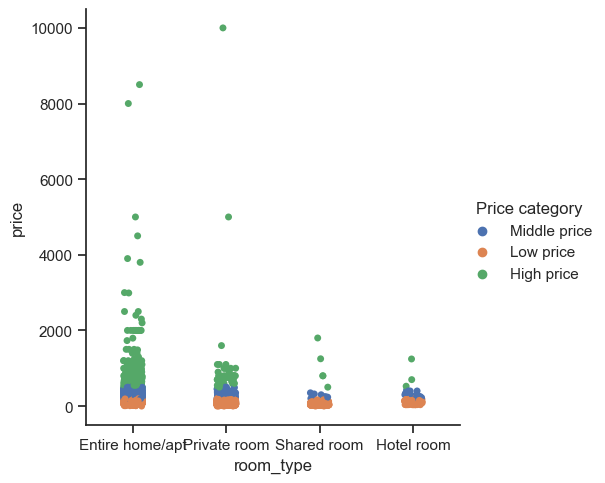

In [63]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="room_type", y="price", hue="Price category", data=df_rentals)

##### This scatterplot shows the distribution of rental prices across different types of rooms. Each dots represents the price of a rental property, categorized by the type of room being rented out.

##### The vertical dots spread out shows the range of prices. Higher dots indicate more expensive rentals. the dots that are much higher than others within the same room type category represent outliers, which are notably more expensive than the typical rentals of that type. 

##### Entire homes/apartments tend to be more expensive than private or shared rooms. 


# 7. Export data

In [64]:
df_rentals.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_rental_updated.csv'))